importing libraries

In [344]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

Slicing and Date as column

In [345]:

data = pd.read_csv('../TCS_stock_data.CSV')

data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

start_date = '2020-07-01'
end_date = '2023-06-01'

sample = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
sample.set_index('Date', inplace=True)


Finding %delivery average value and average increment

In [346]:
window_size = 10
per = []
deliv = []
# Iterate through windows of size 10
for i in range(len(sample) - window_size + 1):
    window = sample.iloc[i : i + window_size]  # Get the current window

    first_close = window.iloc[0]['Close']
    last_close = window.iloc[-1]['Close']
    delivery_values = window.iloc[:3]['%Delivery'].str.rstrip('%').astype(float)
    if all(val >= 60 for val in delivery_values):
        min_delivery = delivery_values.min()
        percentage = ((last_close - first_close) / first_close )*100
        if percentage > 0:
            date = window.index[0].date()
            #print(date, min_delivery, percentage)
            if percentage >= 2:
                per.append(percentage)
                deliv.append(min_delivery)
                print(date, min_delivery, percentage)
print("--------------------------------------")
print("Average increment Close % :-",sum(per)/len(per))
print("Average % delivery change :-",sum(deliv)/len(deliv))

2021-05-12 60.9 2.2962786549309184
2021-05-19 62.6 2.3036988968202468
2021-07-20 60.2 2.46739820921377
2021-07-23 60.3 2.2129838253038896
2021-07-29 63.5 4.643591580344209
2021-08-06 60.6 7.544260901060857
2021-08-17 62.4 6.569001246286697
2021-08-26 60.7 2.786056109853759
2021-11-18 64.0 4.810540419402274
2021-11-22 67.3 5.263996476946463
2021-11-23 67.3 2.0826990546294324
2021-11-30 62.4 2.2810025710265225
2021-12-15 61.8 3.8147505779978013
2021-12-21 61.7 5.804671123679051
2021-12-28 63.0 4.6755081331427055
2021-12-29 60.3 5.986953039045309
2021-12-30 60.3 3.378638151991968
2021-12-31 60.3 4.267920334303591
2022-03-15 63.4 3.101093492837068
2022-04-19 64.4 2.0305884959237512
2022-05-19 60.5 2.8587195205558813
2022-05-20 60.5 3.9477679927118126
2022-05-23 60.5 3.564383291939493
2022-05-24 60.8 4.347626246958639
2022-05-25 63.0 6.157563336682146
2022-08-29 60.9 3.5242821430815745
2022-10-28 66.1 4.827312131510316
2022-10-31 66.1 4.4579835701055
2022-11-01 61.0 2.236406666129984
2022-1

Applying averages to find dates.

In [347]:
window_size = 10
percent_close = 3.7821
delivery_change = 62.214

result_df = pd.DataFrame(columns=['Date', 'Min_Delivery', 'Percentage'])
# Iterate through windows of size 10
for i in range(len(sample) - window_size + 1):
    window = sample.iloc[i : i + window_size]  # Get the current window

    first_close = window.iloc[0]['Close']
    last_close = window.iloc[-1]['Close']
    delivery_values = window.iloc[:3]['%Delivery'].str.rstrip('%').astype(float)
    if all(val >= delivery_change for val in delivery_values):
        min_delivery = delivery_values.min()
        percentage = ((last_close - first_close) / first_close )*100
        if percentage >= percent_close:
            date = window.index[0].date()
            result_df.loc[len(result_df)] = [date, min_delivery, percentage]

print(result_df)

         Date  Min_Delivery  Percentage
0  2021-07-29          63.5    4.643592
1  2021-08-17          62.4    6.569001
2  2021-11-18          64.0    4.810540
3  2021-11-22          67.3    5.263996
4  2021-12-28          63.0    4.675508
5  2022-05-25          63.0    6.157563
6  2022-10-28          66.1    4.827312
7  2022-10-31          66.1    4.457984
8  2023-01-27          63.6    3.805281


plotting Percentage Delivery.

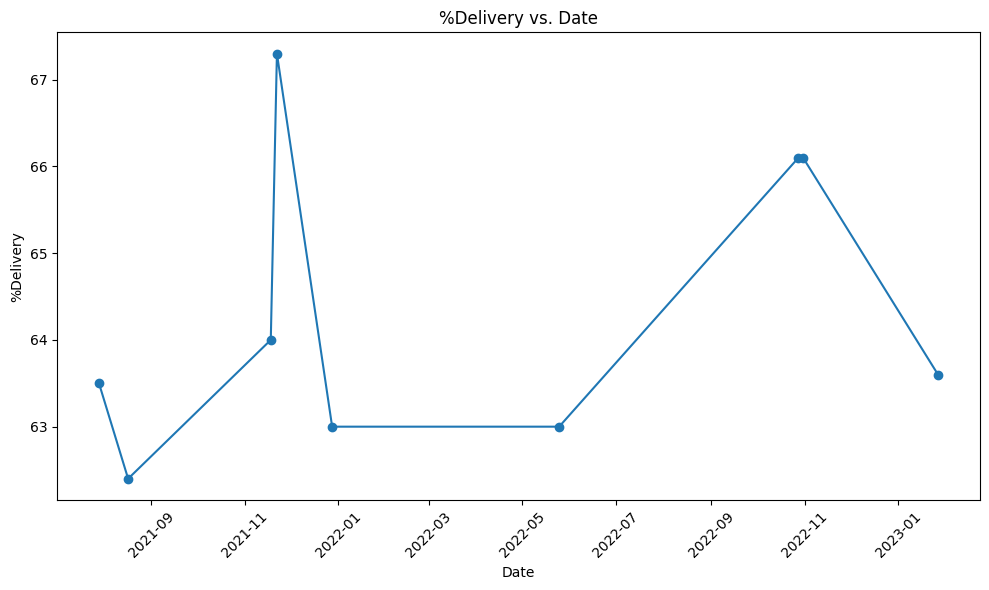

In [348]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(result_df['Date'], result_df['Min_Delivery'], marker='o')
plt.title('%Delivery vs. Date')
plt.xlabel('Date')
plt.ylabel('%Delivery')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

GolderCrossOver Signal

In [349]:
def GoldenCrossverSignal(point):
    path = '../TCS_stock_data.CSV'
    data = pd.read_csv(path,parse_dates=['Date'],index_col='Date') #using for removing the first index

    data['20_SMA'] = data.Close.rolling(window=20, min_periods=1).mean()    #20 SMA's data
    data['50_SMA'] = data.Close.rolling(window=50, min_periods=1).mean()    #50 SMA's data

    data['Signal'] = 0
    data['Signal'] = np.where(data['20_SMA'] > data['50_SMA'],1,0)    #numpy's function which check the condition and simply assisgn the value
    # 1 -> sell & 0 -> buy in data['signal']

    data['Position'] = data.Signal.diff()  #difference between upper and lower value  1 -> buy  -1 sell

    df_pos = data.iloc[-point:][(data.iloc[-point:]['Position'] == 1) | (data['Position'] == -1)].copy()
    df_pos['Position'] = df_pos['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')


    print(tabulate(df_pos[['Close', 'Position']], headers = 'keys', tablefmt = 'psql'))
    return  df_pos

Calling that function

In [350]:
df_pos = GoldenCrossverSignal(726)
print(df_pos['Position'])



+------------+---------+------------+
| Date       |   Close | Position   |
|------------+---------+------------|
| 02-03-2021 | 3006.35 | Sell       |
| 07-04-2021 | 3271.4  | Buy        |
| 17-05-2021 | 3069.75 | Sell       |
| 14-06-2021 | 3276.35 | Buy        |
| 30-07-2021 | 3167.45 | Sell       |
| 16-08-2021 | 3472.95 | Buy        |
| 25-10-2021 | 3492.95 | Sell       |
| 20-12-2021 | 3556.9  | Buy        |
| 21-02-2022 | 3719.4  | Sell       |
| 06-04-2022 | 3755.35 | Buy        |
| 29-04-2022 | 3546.7  | Sell       |
| 16-08-2022 | 3392.7  | Buy        |
| 14-09-2022 | 3120.4  | Sell       |
| 02-11-2022 | 3241.7  | Buy        |
| 02-01-2023 | 3261.45 | Sell       |
| 25-01-2023 | 3429.75 | Buy        |
| 15-03-2023 | 3198.9  | Sell       |
| 18-05-2023 | 3199.85 | Buy        |
| 28-06-2023 | 3197.35 | Sell       |
| 14-07-2023 | 3514.65 | Buy        |
+------------+---------+------------+
Date
02-03-2021    Sell
07-04-2021     Buy
17-05-2021    Sell
14-06-2021     Buy
30-07-2

Plotting signal and put buy & sell signal

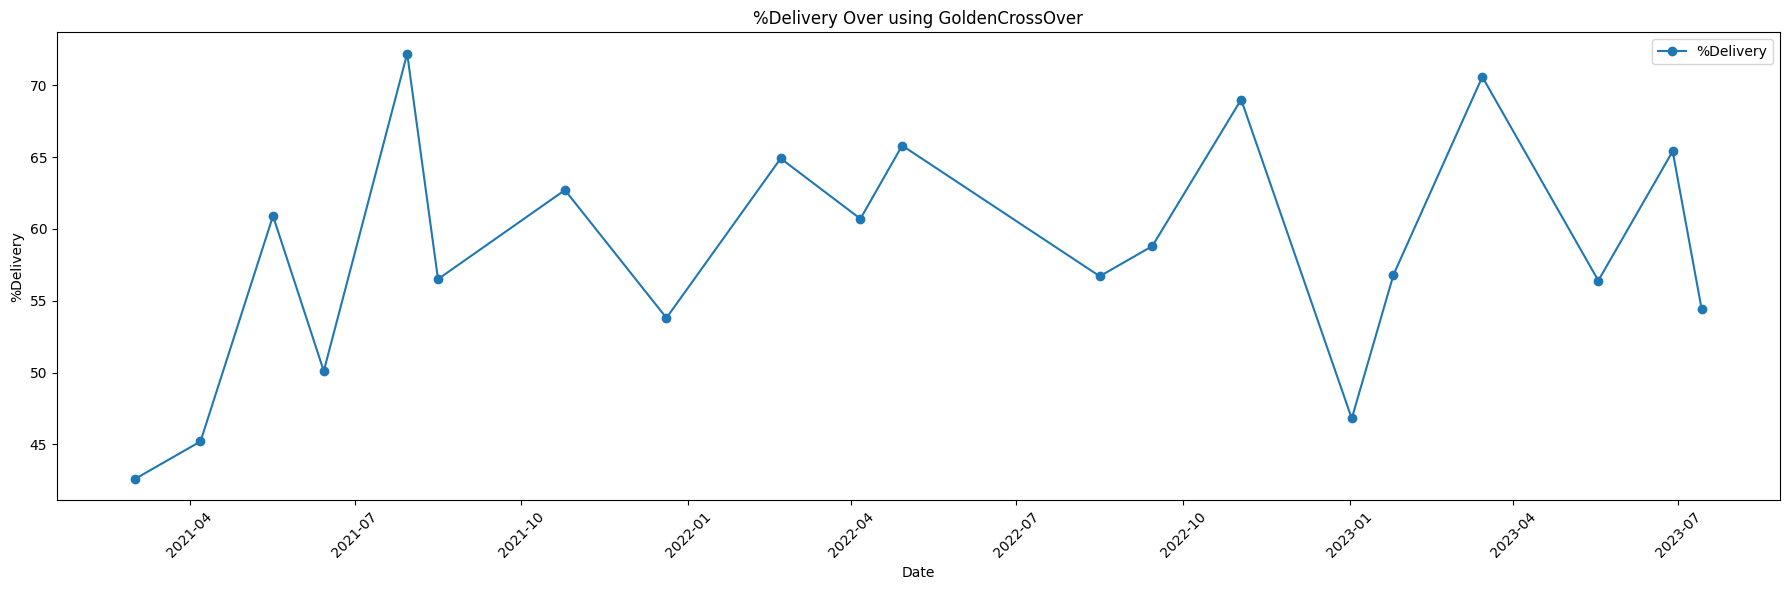

In [357]:
df_pos.index = pd.to_datetime(df_pos.index, format='%d-%m-%Y')


plt.figure(figsize=(18, 6))

# Plot the '%Delivery' values
plt.plot(df_pos.index, df_pos['%Delivery'], marker='o', label='%Delivery')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('%Delivery')
plt.title('%Delivery Over using GoldenCrossOver')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()


0    63.5
1    62.4
2    64.0
3    67.3
4    63.0
5    63.0
6    66.1
7    66.1
8    63.6
Name: Min_Delivery, dtype: float64


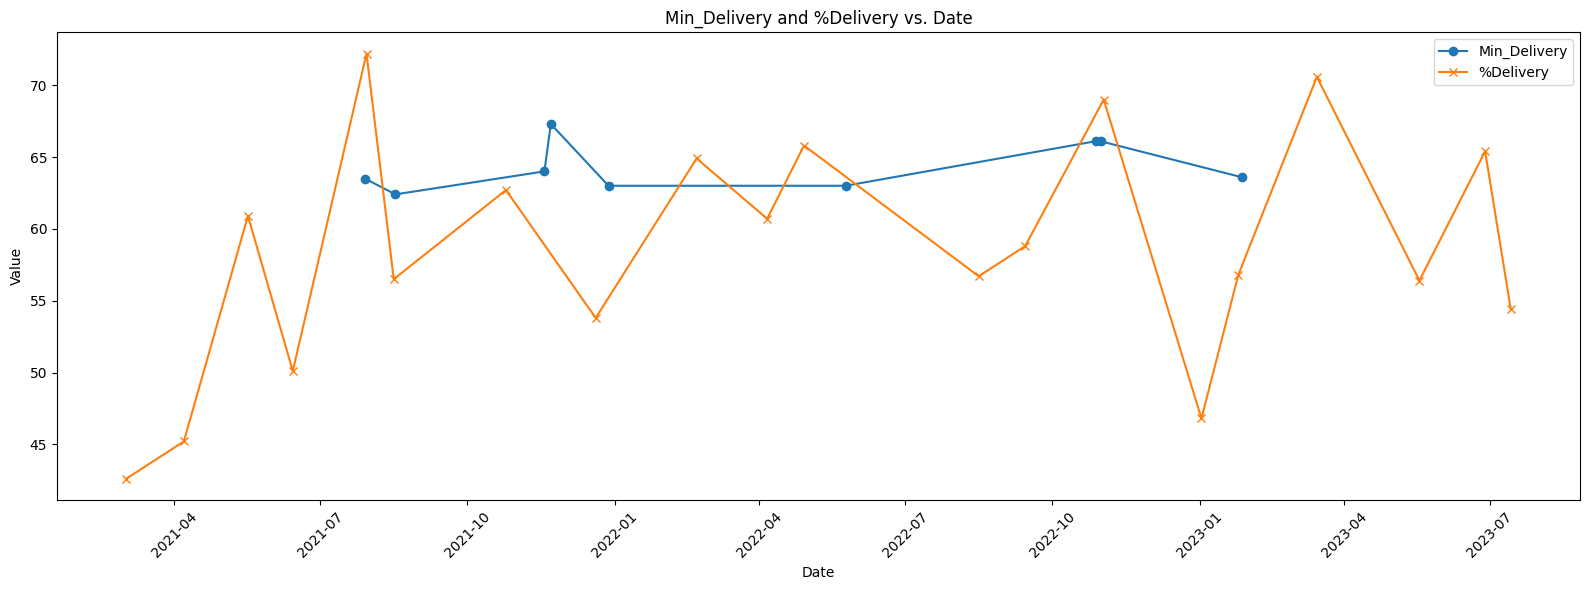

In [358]:
result_df['Date'] = pd.to_datetime(result_df['Date'], format='%Y-%m-%d')

df_pos.index = pd.to_datetime(df_pos.index, format='%d-%m-%Y')
print(result_df['Min_Delivery'])

# Plotting the data
plt.figure(figsize=(16, 6))

# Plotting the Min_Delivery values
plt.plot(result_df['Date'], result_df['Min_Delivery'], marker='o', label='Min_Delivery')

# Plotting the %Delivery values from df_pos using its index (assumed to be dates)
plt.plot(df_pos.index, df_pos['%Delivery'], marker='x', label='%Delivery') #str.rstrip('%').astype(float)

plt.title('Min_Delivery and %Delivery vs. Date')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()
